<a href="https://colab.research.google.com/github/tubagusibrohim/Fraud-detection-at-self-checkouts-in-retail/blob/main/Classification%20fraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang

Pada notebook ini akan digunakan dataset [Fraud detection at self-checkouts in retail](https://www.data-mining-cup.com/reviews/dmc-2019/) dari Data Mining Cup 2019 untuk membuat model yang dapat mendeteksi fraud berdasarkan atribut yang ada.

# Import dan preprocessing data

In [4]:
import pandas as pd
import numpy as np
import warnings

In [5]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/tubagusibrohim/Fraud-detection-at-self-checkouts-in-retail/main/trainfraud.csv')

# Bentuk dataset
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (1879, 10)


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [16]:
df.dtypes

trustLevel                     int64
totalScanTimeInSeconds         int64
grandTotal                   float64
lineItemVoids                  int64
scansWithoutRegistration       int64
quantityModifications          int64
scannedLineItemsPerSecond    float64
valuePerSecond               float64
lineItemVoidsPerPosition     float64
fraud                          int64
dtype: object

Dikarenakan tipe data berbeda , maka akan disamakan dengan fungsi `astype ()`

In [22]:
df = df = df.astype(int)

In [23]:
df.dtypes

trustLevel                   int64
totalScanTimeInSeconds       int64
grandTotal                   int64
lineItemVoids                int64
scansWithoutRegistration     int64
quantityModifications        int64
scannedLineItemsPerSecond    int64
valuePerSecond               int64
lineItemVoidsPerPosition     int64
fraud                        int64
dtype: object

Sebelum membuat model akan dilakukan preprocessing data yang bertujuan untuk menjadikan data lebih akurat dan bagus

## Missing Value
Dalam beberapa kasus, data  mungkin memiliki nilai yang hilang di beberapa kolom, ini dapat disebabkan oleh beberapa alasan seperti kesalahan manusia. Kita bisa menggunakan fungsi is_null () dari library Pandas untuk memeriksa data yang hilang dan kemudian menggunakan fungsi sum () untuk melihat total nilai yang hilang di setiap kolom.

In [24]:
df.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

Dari hasil tersebut saya dapat yakin bahwa data tidak memiliki nilai yang hilang dan siap digunakan.

## Distribusi Kelas
Dalam kasus ini di mana kelas yang diharapkan dibagi menjadi dua hasil, '1 = ya' dan '0 = tidak', distribusi kelas 80:20 dapat dianggap ideal.

In [25]:
df['fraud'].value_counts()

0    1775
1     104
Name: fraud, dtype: int64

Dikarenakan jumlahnya bisa dibilang 1 : 100 , maka kelas menjadi unbalanced atau tidak seimbang , maka perlu dilakukan proses untuk menghasilkan model yang lebih baik.

## Scale Numeric Data
Saya akan menskalakan data numerik untuk menghindari kehadiran outlier yang dapat memengaruhi model kami secara signifikan.
Menggunakan fungsi `StandardScaler ()` dari sklearn dapat menskalakan setiap kolom yang berisi data numerik.

In [26]:
# Mengcopy dataset
df_ready = df.copy()
df_ready = df_ready.drop(['fraud'],axis=1)
df_ready

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,5,1054,54,7,0,3,0,0,0
1,3,108,27,5,2,4,0,0,0
2,3,1516,62,3,10,5,0,0,0
3,6,1791,92,8,4,4,0,0,0
4,5,430,81,3,7,2,0,0,0
...,...,...,...,...,...,...,...,...,...
1874,1,321,76,8,7,2,0,0,0
1875,1,397,41,5,5,0,0,0,0
1876,4,316,41,5,8,1,0,0,0
1877,2,685,62,1,6,2,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
colums = ['trustLevel','totalScanTimeInSeconds','grandTotal','lineItemVoids','scansWithoutRegistration','quantityModifications','scannedLineItemsPerSecond','valuePerSecond','lineItemVoidsPerPosition']
df_ready[colums] = scaler.fit_transform(df_ready[colums])

df_ready.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,0.935189,0.229898,0.125538,0.443466,-1.562415,0.280068,-0.076406,-0.08093,-0.332514
1,-0.235121,-1.554996,-0.808049,-0.136202,-0.925241,0.870031,-0.076406,-0.08093,-0.332514
2,-0.235121,1.101590,0.402157,-0.715870,1.623453,1.459994,-0.076406,-0.08093,-0.332514
3,1.520344,1.620455,1.439476,0.733300,-0.288068,0.870031,-0.076406,-0.08093,-0.332514
4,0.935189,-0.947453,1.059125,-0.715870,0.667693,-0.309895,-0.076406,-0.08093,-0.332514


# Select Feature Target
Data yang tadinya 1:100 akan diubah menjadi 80:20.
X sebagai Feature dan Y sebagai Target

In [28]:
# Features
feature = df_ready

# Target
target = df['fraud']

In [29]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1503, 9)
(376, 9)
(1503,)
(376,)


Hasilnya data training memiliki 1503 rows and 376 untuk data testing.

# Modeling
Disini saya akan mencoba membangun 3 model berbeda dengan algoritma berbeda. Pada langkah ini kita akan membuat model dasar untuk setiap algoritma menggunakan parameter default yang ditetapkan oleh sklearn dan setelah membangun semua 3 model, model akan dibandingkan untuk melihat mana yang terbaik untuk kasus ini.

## Decision Tree

In [30]:
# Decision Tree model 
from sklearn import tree


dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

 
y_pred_dtc = dtc.predict(X_test)

In [31]:
from sklearn import metrics

# Display confussion matrix
dtc_cm = metrics.confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix:\n', dtc_cm)

# Calculate area under curve (AUC)
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
dtc_fpr, dtc_tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
dtc_auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('Area Under Curve:', dtc_auc)

# Calculate accuracy, precision, recall, f1-score, and kappa score
dtc_acc = metrics.accuracy_score(y_test, y_pred_dtc)
dtc_prec = metrics.precision_score(y_test, y_pred_dtc)
dtc_rec = metrics.recall_score(y_test, y_pred_dtc)
dtc_f1 = metrics.f1_score(y_test, y_pred_dtc)
dtc_kappa = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print('Accuracy:', dtc_acc)
print('Precision:', dtc_prec)
print('Recall:', dtc_rec)
print('F1 Score:', dtc_f1)
print('Cohens Kappa Score:', dtc_kappa)

Confusion Matrix:
 [[339  14]
 [ 11  12]]
Area Under Curve: 0.7410395368887794
Accuracy: 0.9335106382978723
Precision: 0.46153846153846156
Recall: 0.5217391304347826
F1 Score: 0.4897959183673469
Cohens Kappa Score: 0.4543765962386812


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
 
y_pred_rf = rf.predict(X_test)

In [33]:
# Display confussion matrix
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', rf_cm)

# Calculate area under curve (AUC)
y_pred_rf_proba = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
rf_auc = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print('Area Under Curve:', rf_auc)

# Calculate accuracy, precision, recall, f1-score, and kappa score
rf_acc = metrics.accuracy_score(y_test, y_pred_rf)
rf_prec = metrics.precision_score(y_test, y_pred_rf)
rf_rec = metrics.recall_score(y_test, y_pred_rf)
rf_f1 = metrics.f1_score(y_test, y_pred_rf)
rf_kappa = metrics.cohen_kappa_score(y_test, y_pred_rf)

print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)
print('Cohens Kappa Score:', rf_kappa)



Confusion Matrix:
 [[346   7]
 [ 19   4]]
Area Under Curve: 0.9350905283901959
Accuracy: 0.9308510638297872
Precision: 0.36363636363636365
Recall: 0.17391304347826086
F1 Score: 0.2352941176470588
Cohens Kappa Score: 0.20377911712005214


## Naive Bayes


In [34]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)


y_pred_nb = nb.predict(X_test)

In [35]:
# Display confussion matrix
nb_cm = metrics.confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', nb_cm)

# Calculate area under curve (AUC)
y_pred_nb_proba = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr, _ = metrics.roc_curve(y_test,  y_pred_nb_proba)
nb_auc = metrics.roc_auc_score(y_test, y_pred_nb_proba)
print('Area Under Curve:', nb_auc)

# Calculate accuracy, precision, recall, f1-score, and kappa score
nb_acc = metrics.accuracy_score(y_test, y_pred_nb)
nb_prec = metrics.precision_score(y_test, y_pred_nb)
nb_rec = metrics.recall_score(y_test, y_pred_nb)
nb_f1 = metrics.f1_score(y_test, y_pred_nb)
nb_kappa = metrics.cohen_kappa_score(y_test, y_pred_nb)

print('Accuracy:', nb_acc)
print('Precision:', nb_prec)
print('Recall:', nb_rec)
print('F1 Score:', nb_f1)
print('Cohens Kappa Score:', nb_kappa)

Confusion Matrix:
 [[230 123]
 [  0  23]]
Area Under Curve: 0.9547358049020815
Accuracy: 0.6728723404255319
Precision: 0.15753424657534246
Recall: 1.0
F1 Score: 0.27218934911242604
Cohens Kappa Score: 0.18617582881678052


# Perbandingan Model
Setelah membuat semua model , sekarang dapat membandingkan seberapa baik performa setiap model. Untuk melakukan ini maka akan dibuat dua chart, pertama adalah chart batang yang dikelompokkan untuk menampilkan nilai akurasi, presisi, perolehan, f1, dan skor kappa model kita, dan kedua chart garis untuk menunjukkan ABK dari semua model kita.

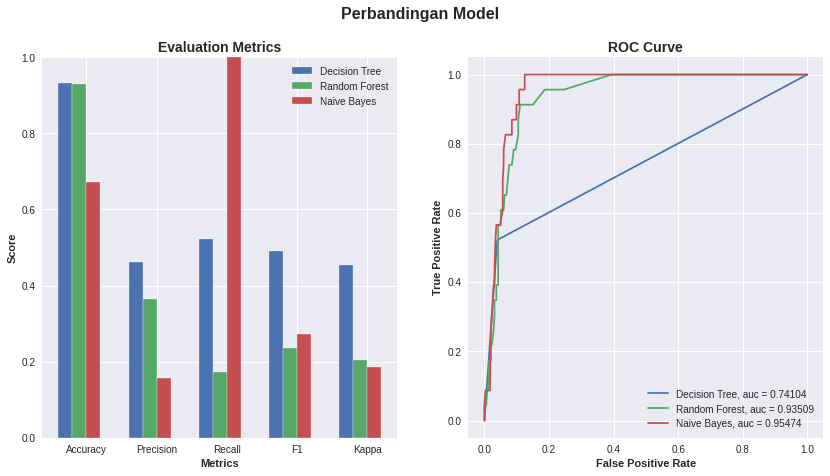

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Perbandingan Model', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_acc, dtc_prec, dtc_rec, dtc_f1, dtc_kappa]
rf_score = [rf_acc, rf_prec, rf_rec, rf_f1, rf_kappa]
nb_score = [nb_acc, nb_prec, nb_rec, nb_f1, nb_kappa]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_fpr, dtc_tpr, label='Decision Tree, auc = {:0.5f}'.format(dtc_auc))
ax2.plot(rf_fpr, rf_tpr, label='Random Forest, auc = {:0.5f}'.format(rf_auc))
ax2.plot(nb_fpr, nb_tpr, label='Naive Bayes, auc = {:0.5f}'.format(nb_auc))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Dilihat dari gambar di atas, dapat dilihat bahwa model Random Forest berada di puncak model lain dalam 4 dari 6 metrik yang dievaluasi, kecuali recall dan AUC. Jadi kita bisa berasumsi bahwa Random Forest adalah pilihan yang tepat untuk menyelesaikan kasus ini.

# Tuning Parameter dengan menggunakan Grid Search Cross Validation
Saya akan menggunakan fungsi `GridSearchCV` dari sklearn untuk menemukan parameter optimal untuk model Random Forest. Saya akan memberikan model dasar dengan nama rf_grids. Fungsi `GridSearchCV` akan mengulangi setiap kombinasi parameter untuk menemukan parameter skor terbaik.

In [39]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500, 750, 1000]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 27.8min finished


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

Setelah menemukan parameter terbaik untuk model, kita dapat mengakses atribut `best_estimator_` dari objek GridSearchCV untuk menyimpan model yang dioptimalkan ke dalam variabel yang disebut` best_grid`. Setelah itu 6 metrik evaluasi akan dibandingkan dengan model awal.

In [40]:
best_grid = grid_search.best_estimator_
best_grid_pred = best_grid.predict(X_test)

# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)
best_grid_kappa = metrics.cohen_kappa_score(y_test, best_grid_pred)

# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(X_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

## Perbandingan Model

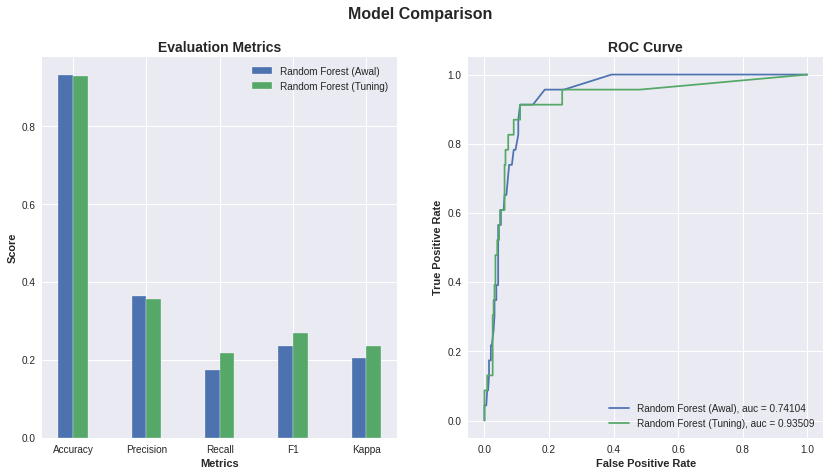

Berubah -0.29% pada accuracy.
Berubah -1.79% pada precision.
Berubah 25.00% pada recall.
Berubah 14.86% pada F1 score.
Berubah 15.25% pada Kappa score.
Berubah -1.80% pada AUC.


In [42]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_acc, rf_prec, rf_rec, rf_f1, rf_kappa]
best_grid_score = [best_grid_acc, best_grid_prec, best_grid_rec, best_grid_f1, best_grid_kappa]    

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Awal)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Tuning)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_fpr, rf_tpr, label='Random Forest (Awal), auc = {:0.5f}'.format(dtc_auc))
ax2.plot(best_grid_fpr, best_grid_tpr, label='Random Forest (Tuning), auc = {:0.5f}'.format(rf_auc))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Berubah {:0.2f}% pada accuracy.'.format(100 * (best_grid_acc - rf_acc) / rf_acc))
print('Berubah {:0.2f}% pada precision.'.format(100 * (best_grid_prec - rf_prec) / rf_prec))
print('Berubah {:0.2f}% pada recall.'.format(100 * (best_grid_rec - rf_rec) / rf_rec))
print('Berubah {:0.2f}% pada F1 score.'.format(100 * (best_grid_f1 - rf_f1) / rf_f1))
print('Berubah {:0.2f}% pada Kappa score.'.format(100 * (best_grid_kappa - rf_kappa) / rf_kappa))
print('Berubah {:0.2f}% pada AUC.'.format(100 * (best_grid_auc - rf_auc) / rf_auc))

Hasilnya menunjukkan bahwa pengoptimalan sedikit lebih baik daripada model aslinya. Model yang dioptimalkan menunjukkan peningkatan 3 dari 6 metrik tetapi berperforma lebih buruk di metrik lainnya. Karena yang ingin difokuskan pada memprediksi sebanyak mungkin nilai positif aktual, maka akan digunakan model yang sudah dituning karena memiliki skor recall yang lebih tinggi.

# Hasil Akhir
Pada hasil akhir ini akan diprediksikan hasil yang diharapkan dari semua baris dari dataset sebelumnya

In [44]:
df ['fraud_prediction'] = rf.predict(feature)

df.head(10)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,fraud_prediction
0,5,1054,54,7,0,3,0,0,0,0,0
1,3,108,27,5,2,4,0,0,0,0,0
2,3,1516,62,3,10,5,0,0,0,0,0
3,6,1791,92,8,4,4,0,0,0,0,0
4,5,430,81,3,7,2,0,0,0,0,0
5,1,770,11,11,5,2,0,0,0,1,1
6,3,294,55,2,7,1,0,0,0,0,0
7,2,1545,22,0,8,4,0,0,0,0,0
8,6,962,65,7,0,2,0,0,0,0,0
9,2,725,41,10,2,4,0,0,0,0,0


# Kesimpulan

In [45]:
# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_acc = metrics.accuracy_score(y_test, best_grid_pred)
best_grid_prec = metrics.precision_score(y_test, best_grid_pred)
best_grid_rec = metrics.recall_score(y_test, best_grid_pred)
best_grid_f1 = metrics.f1_score(y_test, best_grid_pred)
best_grid_kappa = metrics.cohen_kappa_score(y_test, best_grid_pred)

# Calculate area under curve (AUC)
best_grid_pred_proba = best_grid.predict_proba(X_test)[::,1]
best_grid_fpr, best_grid_tpr, _ = metrics.roc_curve(y_test,  best_grid_pred_proba)
best_grid_auc = metrics.roc_auc_score(y_test, best_grid_pred_proba)

print('Accuracy:', best_grid_acc)
print('Precision:', best_grid_prec)
print('Recall:', best_grid_rec)
print('F1 Score:', best_grid_f1)
print('Cohens Kappa Score:', best_grid_kappa)



Accuracy: 0.9281914893617021
Precision: 0.35714285714285715
Recall: 0.21739130434782608
F1 Score: 0.27027027027027023
Cohens Kappa Score: 0.2348507687669582


Untuk model sederhana, dapat dilihat bahwa model kita melakukan klasifikasi data dengan baik dan sudah dioptimalkan menggunakan `GridSearchCV` yang berarti mencapai batas dengan model ini.